# Recupération des donées du fichier csv 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 
import csv

data = []

with open('C:\\Users\\TRETEC\\Documents\\S2I\\Projet TP AARN\\training.1600000.processed.noemoticon.csv',
          'r', newline='', encoding='latin-1') as file:
    reader = csv.reader(file, delimiter=',')
    for row in reader:
        data.append(row)



print(len(data))
data_array = np.array(data)

print(data_array.shape)


1600000
(1600000, 6)


# Recupération de Target et le texte 

In [44]:
print(data_array[0])
y = data_array[:, 0]  
X= data_array[:, -1]  
print(X[0])

['0' '1467810369' 'Mon Apr 06 22:19:45 PDT 2009' 'NO_QUERY'
 '_TheSpecialOne_'
 "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]
Dimensions de x : (1600000,)
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


# Étape 1 : préparation des données


## fonction transformer un texte en miniscule


In [46]:
def convert_to_lowercase(element):
    return element.lower()

 ## fonction qui supprime les balises html


In [47]:
import re
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text


In [48]:
# les import et tel pour la radicalisation 
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TRETEC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## fonction qui radicalise un texte


In [49]:
def radicaliser_texte(texte):
    stemmer = PorterStemmer()
    mots = nltk.word_tokenize(texte)
    texte_radicalise = ' '.join([stemmer.stem(mot) for mot in mots])
    return texte_radicalise



## fonction nettoyage d'un texte


In [50]:
def nettoyer_texte(texte):
    texte_nettoye = re.sub(r'[^a-zA-Z\s\']', ' ', texte)
    texte_nettoye = texte_nettoye.replace("'", " ")   
    texte_nettoye = re.sub(r'\s+', ' ', texte_nettoye)
    return texte_nettoye


## fonction qui supprimer les liens 


In [51]:
import re
def supprimer_liens(texte):
   
    motif_url = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'    
    texte_sans_liens = re.sub(motif_url, '', texte)
    return texte_sans_liens

## fonction supp les mots_vides


In [52]:

from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TRETEC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
def supprimer_mots_vides(texte):
    
    mots_vides = set(stopwords.words('english'))
    mots = texte.split()    
    mots_filtres = [mot for mot in mots if mot.lower() not in mots_vides]    
    texte_filtre = ' '.join(mots_filtres)
    return texte_filtre



# Nettoyage des tweets :

In [54]:
print(X[0])
print(X[10])
for i in range(len(X)):
    p=X[i]
    p=convert_to_lowercase(p)
    p=supprimer_liens(p)
    p=remove_html_tags(p)
    p=radicaliser_texte(p)
    p=nettoyer_texte(p)
    p=supprimer_mots_vides(p)
    X[i]=p
print(X[0])
print(X[10])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
spring break in plain city... it's snowing 
switchfoot awww bummer shoulda got david carr third day
spring break plain citi snow


In [16]:
print(X[11])
print(X[160000])
print(y[0])

pierc ear
tiffanylu know wa listenin bad habit earlier start freakin hi part
0


In [55]:
import pickle

with open('X_apres_net.pkl', 'wb') as f:
    pickle.dump(X, f)

## fonction construction vocabulaire


In [17]:
from collections import Counter
def construire_vocabulaire(corpus_tweets, seuil_frequence):
    mots_corpus = [mot for tweet in corpus_tweets for mot in tweet.split()]
    frequence_mots = Counter(mots_corpus)
    vocabulaire = [mot for mot, frequence in frequence_mots.items() if frequence >= seuil_frequence]
    return vocabulaire

# Construction du vocabulaire 

In [19]:
#creation fichier voc
def con_fich(vocabulaire, nom_fichier):
  
    with open(nom_fichier, 'w', encoding='latin-1') as fichier:
        for mot in vocabulaire:
            fichier.write(f"{mot}\n")

#fichier voc
seuil_frequence = 1000
vocabulaire = construire_vocabulaire(X, seuil_frequence)
nom_fichier = 'vocabulaire.txt'
con_fich(vocabulaire, nom_fichier)

## Fonction qui recupere les index du tweet dans le vocab


In [21]:
def mapper_mots_index(tweet_pretraite, vocabulaire):
   
    # Diviser le tweet prétraité en mots individuels
    mots_tweet = tweet_pretraite.split()
    
    # Mapper chaque mot à son index dans le vocabulaire
    index_mots = []
    for mot in mots_tweet:
        if mot in vocabulaire:
            index = vocabulaire.index(mot)
            index_mots.append(index)
    return index_mots
index_mots = mapper_mots_index(X[0], vocabulaire)
print(index_mots)
print(X[0]) 

[0, 1, 2, 3, 4]
switchfoot awww bummer shoulda got david carr third day


## Mapper tout les tweet  

In [25]:
index_tweet= []

for i  in range(len(X)):
    index_mots=mapper_mots_index(X[i], vocabulaire)
    index_tweet.append(index_mots)
    
    


In [57]:
import pickle

with open('index_tweet.pkl', 'wb') as f:
    pickle.dump(index_tweet, f)

In [1]:
import pickle

with open('index_tweet.pkl', 'rb') as f:
    index_tweet = pickle.load(f)

In [64]:
with open('matrice_y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [14]:
import pickle
with open('matrice_y.pkl', 'rb') as f:
    y = pickle.load(f)

# Extraction de caractéristiques

In [9]:
import numpy as np
shape = (len(index_tweet), len(vocabulaire))  
x = np.zeros(shape, dtype=np.int64)
for i, ind in enumerate(index_tweet):
    for j in ind:
            x[i][j] = 1

print(x)


[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
import pickle

output_file_pickle = "x_matrix.pkl"

with open(output_file_pickle, 'wb') as f:
    pickle.dump(x, f)

In [8]:
output_file_pickle = "x_matrix.pkl"
with open(output_file_pickle, 'rb') as f:
    x = pickle.load(f)

# Étape 2 : Classification

## Diviser les données en ensembles d'entraînement et de test (70% - 30%)


In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)




In [11]:
output_file_pickle = "X_train.pkl"
with open(output_file_pickle, 'wb') as f:
    pickle.dump(X_train, f)

In [12]:
output_file_pickle = "X_test.pkl"
with open(output_file_pickle, 'wb') as f:
    pickle.dump(X_test, f)

In [13]:
output_file_pickle = "y_train.pkl"
with open(output_file_pickle, 'wb') as f:
    pickle.dump(y_train, f)

In [14]:
output_file_pickle = "y_test.pkl"
with open(output_file_pickle, 'wb') as f:
    pickle.dump(y_test, f)

In [1]:
import pickle
output_file_pickle = "X_train.pkl"
with open(output_file_pickle, 'rb') as f:
    X_train = pickle.load(f)

In [3]:
import pickle

output_file_pickle = "y_train.pkl"
with open(output_file_pickle, 'rb') as f:
    y_train = pickle.load(f)

In [4]:
output_file_pickle = "X_test.pkl"
with open(output_file_pickle, 'rb') as f:
    X_test = pickle.load(f)

In [5]:
output_file_pickle = "y_test.pkl"
with open(output_file_pickle, 'rb') as f:
    y_test = pickle.load(f)

## LOGISTIC REGRESSION

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score
logistic_classifier = LogisticRegression(random_state=0, solver='saga', max_iter=1000, n_jobs=6)
logistic_classifier.fit(X_train, y_train)

C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LogisticRegression(max_iter=1000, n_jobs=6, random_state=0, solver='saga')

In [7]:
predictions = logistic_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Précision du classificateur :", accuracy)

Précision du classificateur : 0.76131875


AUC : 0.8368056746585049


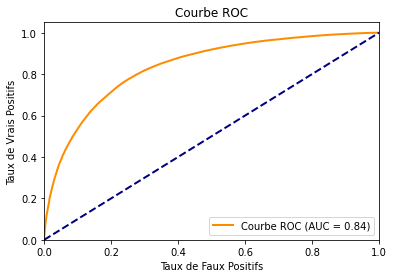

In [8]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = logistic_classifier.predict_proba(X_test)[:, 1]
y_test_binary = (y_test == '4').astype(int)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)
auc = roc_auc_score(y_test_binary, y_proba)
print("AUC :", auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# SGD Classifier

In [3]:
from sklearn.linear_model import SGDClassifier

SGD_classifier = SGDClassifier(loss='hinge', alpha=0.00001, max_iter=10000, random_state=0)
SGD_classifier.fit(X_train, y_train)

C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


SGDClassifier(alpha=1e-05, max_iter=10000, random_state=0)

In [6]:
predictions = SGD_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, predictions)
print("Précision du classificateur :", accuracy)

Précision du classificateur : 0.75840625


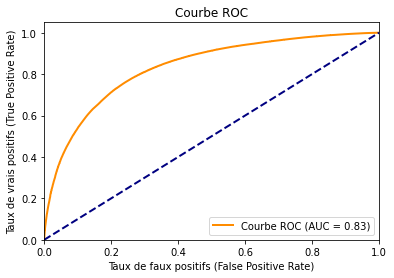

In [9]:
from sklearn.metrics import roc_curve, auc
y_scores = SGD_classifier.decision_function(X_test)
y_test_binary = (y_test == '4').astype(int)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# DecisionTree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_classifier.fit(X_train, y_train)
predictions = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.69960625


# KNeighborsClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=7, n_jobs=6)
knn_classifier.fit(X_train, y_train)

C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KNeighborsClassifier(n_jobs=6, n_neighbors=7)

In [5]:
# Prédire les classes pour les données de test
predictions = knn_classifier.predict(X_test)


In [8]:
# Évaluation des prédictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Précision du classificateur :", accuracy)

Précision du classificateur : 0.7154666666666667


 # SVC

In [ ]:
 from sklearn.svm import SVC
from joblib import Parallel, delayed

num_cores = 6  
subset_size = len(X_train) // num_cores
X_train_subsets = [X_train[i:i+subset_size] for i in range(0, len(X_train), subset_size)]
y_train_subsets = [y_train[i:i+subset_size] for i in range(0, len(y_train), subset_size)]

def train_svc(X_subset, y_subset):
    classifier_svc = SVC(kernel='linear', random_state=0)
    classifier_svc.fit(X_subset, y_subset)
    return classifier_svc


classifiers = Parallel(n_jobs=num_cores)(delayed(train_svc)(X_subset, y_subset) for X_subset, y_subset in zip(X_train_subsets, y_train_subsets))

predictions_svc = np.concatenate([classifier.predict(X_test) for classifier in classifiers])


In [ ]:

accuracy = accuracy_score(y_test, predictions_svc)
print("Précision du classificateur :", accuracy)

# MLPCLASSIFER 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from joblib import Parallel, delayed
from sklearn.datasets import make_classification
mlp_classifier = MLPClassifier(hidden_layer_sizes=(3,), activation='relu', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train, y_train)


C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000)

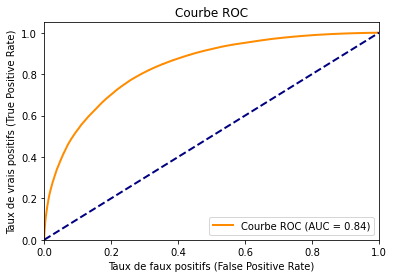

In [8]:

y_prob = mlp_classifier.predict_proba(X_test)[:, 1]
y_test_binary = (y_test == '4').astype(int)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (False Positive Rate)')
plt.ylabel('Taux de vrais positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
predictions_rn = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions_rn)
print("Précision du classificateur :", accuracy)

Précision du classificateur : 0.7566645833333333


## ANN keras

In [1]:
import tensorflow as tf

C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

# input layer
ann.add(tf.keras.layers.Dense(units = 100, activation ='relu'))  # units must be chosen
# hidden layer
ann.add(tf.keras.layers.Dense(units = 50, activation ='relu')) 
# output layer
ann.add(tf.keras.layers.Dense(units = 1)) # we can remove the activation function for the regression

ann.compile(optimizer ='adam',loss='mean_squared_error')
y_train = y_train.astype(int)
ann.fit(X_train,y_train, batch_size =16,epochs=6)

C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"





Epoch 1/6

70000/70000 [==============================] - 154s 2ms/step - loss: 2.5767
Epoch 2/6
70000/70000 [==============================] - 122s 2ms/step - loss: 2.4430
Epoch 3/6
70000/70000 [==============================] - 151s 2ms/step - loss: 2.3745
Epoch 4/6
70000/70000 [==============================] - 155s 2ms/step - loss: 2.3239
Epoch 5/6
70000/70000 [==============================] - 164s 2ms/step - loss: 2.2830
Epoch 6/6
70000/70000 [==============================] - 164s 2ms/step - loss: 2.2476


In [6]:
import numpy as np
from sklearn.metrics import accuracy_score

predictions = ann.predict(X_test)
predictions_transformed = np.where(predictions < 2, 0, 4)
y_test_numeric = y_test.astype(int)
accuracy = accuracy_score(y_test_numeric, predictions_transformed)
print("Accuracy:", accuracy)

15000/15000 [==============================] - 24s 2ms/step
Accuracy: 0.77314375


# CNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.utils import to_categorical
import numpy as np

X_train_ = X_train.reshape(-1, 1000, 1, 1).astype('float32')
del X_train

cnn = Sequential()

cnn.add(Conv2D(32, (3, 1), activation='relu'))  # Taille du noyau (3, 1)
cnn.add(MaxPooling2D((2, 1)))
cnn.add(Conv2D(64, (3, 1), activation='relu'))
cnn.add(MaxPooling2D((2, 1)))
cnn.add(Conv2D(64, (3, 1), activation='relu'))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
y_train_ = y_train.astype('float32')
y_train_ = np.where(y_train_ == 4, 1, 0)
del y_train
cnn.fit(X_train_, y_train_, epochs=6, validation_split=0.2)



C:\Users\TRETEC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"






Epoch 1/6


28000/28000 [==============================] - 831s 30ms/step - loss: 0.5056 - accuracy: 0.7517 - val_loss: 0.4958 - val_accuracy: 0.7571
Epoch 2/6
28000/28000 [==============================] - 763s 27ms/step - loss: 0.4869 - accuracy: 0.7645 - val_loss: 0.4908 - val_accuracy: 0.7623
Epoch 3/6
28000/28000 [==============================] - 884s 32ms/step - loss: 0.4778 - accuracy: 0.7703 - val_loss: 0.4905 - val_accuracy: 0.7621
Epoch 4/6
28000/28000 [==============================] - 857s 31ms/step - loss: 0.4705 - accuracy: 0.7748 - val_loss: 0.4904 - val_accuracy: 0.7621
Epoch 5/6
28000/28000 [==============================] - 706s 25ms/step - loss: 0.4641 - accuracy: 0.7791 - val_loss: 0.4936 - val_accuracy: 0.7617
Epoch 6/6
28000/28000 [==============================] - 685s 24ms/step - loss: 0.4585 - accuracy: 0.7825 - val_loss: 0.4932 - val_accuracy: 0.7602


In [ ]:
del y_train_
del X_train_

In [7]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
X_test_ = X_test.reshape(-1, 1000, 1, 1).astype('float32')
del X_test
y_test_ = y_test.astype('float32')
y_test_ = np.where(y_test_ == 4, 1, 0)
del y_test
y_proba = cnn.predict(X_test_).ravel()
y_pred = np.where(y_proba >= 0.5, 1, 0)
test_accuracy = accuracy_score(y_test_, y_pred)
print("Test accuracy:", test_accuracy)


15000/15000 [==============================] - 107s 7ms/step
Test accuracy: 0.76085


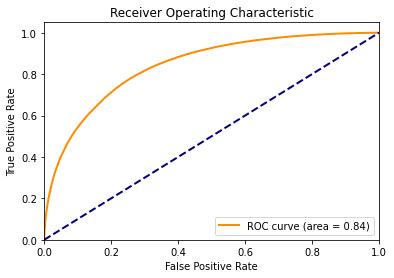

In [8]:
fpr, tpr, thresholds = roc_curve(y_test_, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

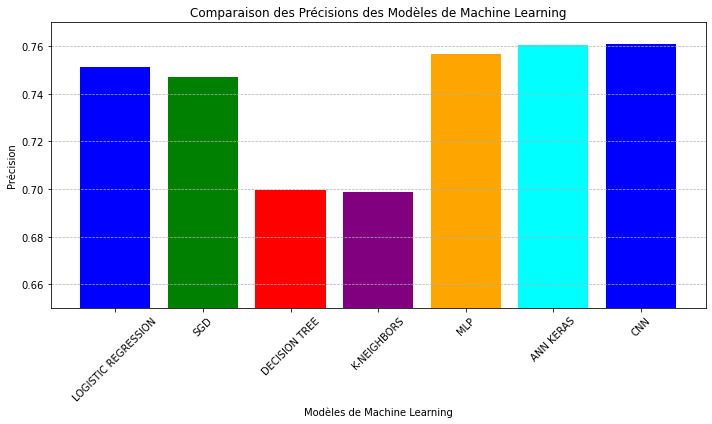

In [2]:
import matplotlib.pyplot as plt

# Données des modèles et leurs précisions
models = [
    'LOGISTIC REGRESSION',
    'SGD',
    'DECISION TREE',
    'K-NEIGHBORS',
    'MLP',
    'ANN KERAS',
    'CNN'
]

precisions = [
    0.7511541666666667,
    0.7472479166666667,
    0.69960625,
    0.6989625,
    0.75664583333333,
    0.7603666666666666,
    0.76085
]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Modèles de Machine Learning')
plt.ylabel('Précision')
plt.title('Comparaison des Précisions des Modèles de Machine Learning')
plt.ylim(0.65, 0.77)  # Ajustement des limites de l'axe y pour une meilleure visibilité
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()
